# Task 1
1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.\
    **Income is on the x-axis, life expectancy is on the y-axis, and it is colored by region, while the size of each point references population.**
2. Import q1data.csv dataset
3. Recreate the plot as best you can using plotnine
4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it's good or bad for visualizing these data.


In [7]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [38]:
#Import q1data.csv dataset
import pandas as pd
import numpy as np

#First 5 rows of data from dataset
df1 = pd.read_excel(r'C:\Users\ryanc\Desktop\GSB_544_Project\Data\q1data.xlsx')
df1.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [94]:
from plotnine import ggplot, scale_size_area, annotate, labs, theme, geom_text, geom_point, aes, stat_smooth, facet_wrap, element_rect, scale_x_log10, ylab, xlab, theme_bw, theme_light, scale_y_continuous, scale_x_continuous, scale_fill_manual, guides
from plotnine import *
filtered1 = df1.dropna(subset=["income","life_exp","population","four_regions"])

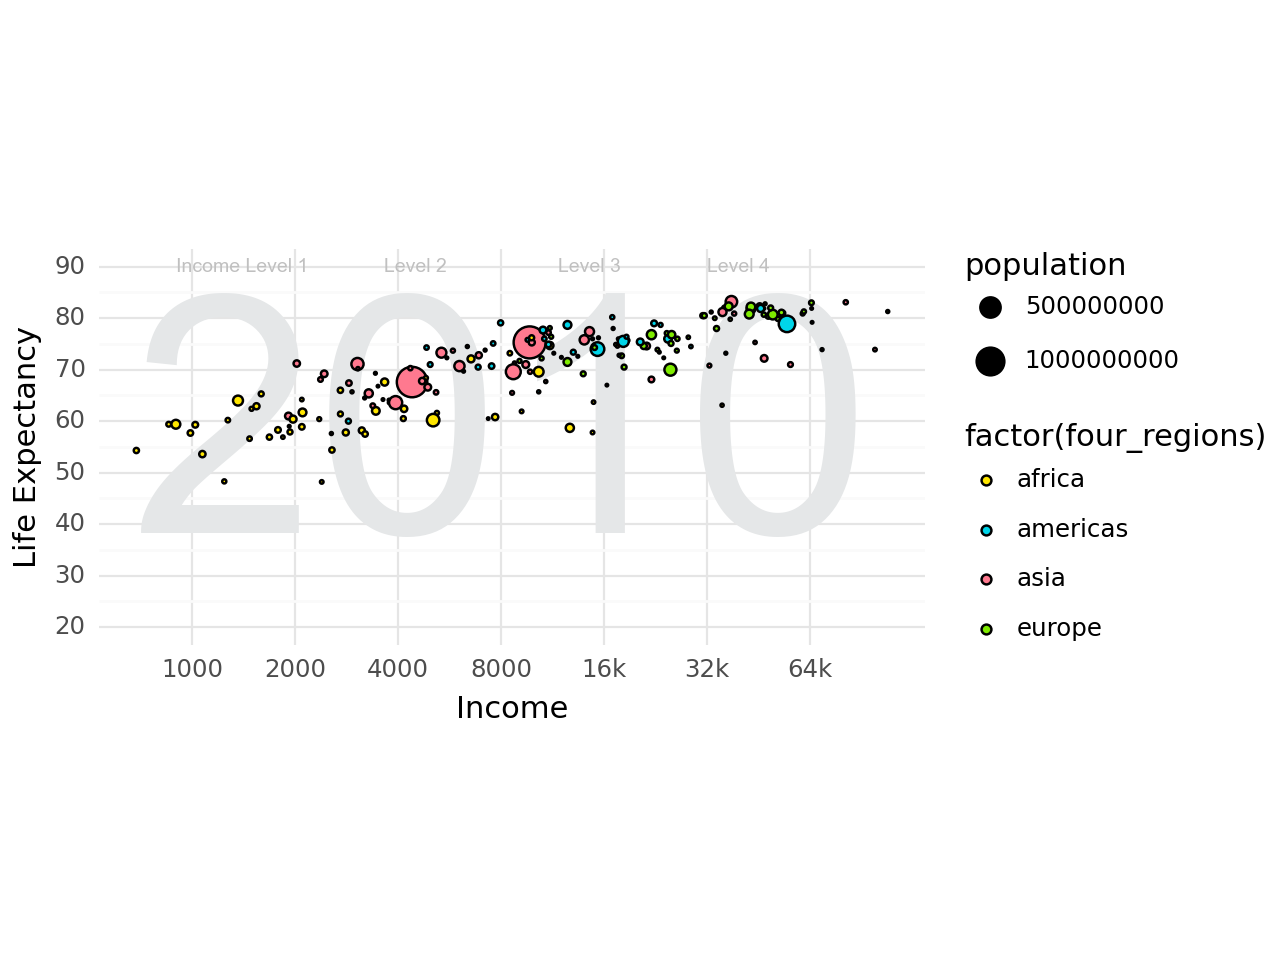

In [102]:
plot1 = (ggplot(filtered1, 
aes(
  x = "income",
  y = "life_exp",
  fill = "factor(four_regions)",
  size = "population"
))
+ annotate('text', x=8000, y=55, label='2010', color = '#E5E7E8', size=120, family="Arial")
+ annotate('text', x=1400, y=90, label='Income Level 1', color = 'silver', size=7, family="Arial")
+ annotate('text', x=4500, y=90, label='Level 2', color = 'silver', size=7, family="Arial")
+ annotate('text', x=14500, y=90, label='Level 3', color = 'silver', size=7, family="Arial")
+ annotate('text', x=39500, y=90, label='Level 4', color = 'silver', size=7, family="Arial")
+ labs(x="Income", y="Life Expectancy")
+ scale_x_continuous(breaks=([500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]),
                    labels = [500, 1000, 2000, 4000, 8000, "16k", "32k", "64k"],
                    trans = 'log2')
+ scale_y_continuous(limits = (20, 90),
                   breaks = range(20,100,10))
+ scale_size_area()
+ scale_fill_manual(values=["#FFE600","#00D5E9","#FF798F", "#7FEB00"])
+ geom_point()
+ coord_fixed(ratio = 0.05)
+ theme_minimal())
print(plot1)